# Image Watermarker

## Importing Libraries

In [9]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

## Importing Images

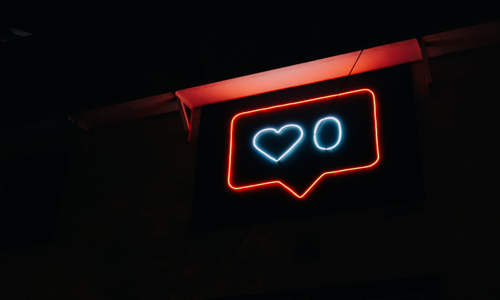

In [2]:
image = Image.open(requests.get('https://images.unsplash.com/photo-1554177255-61502b352de3?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2070&q=80', stream=True).raw)
image_textw = image.resize((500,300))
image_textw

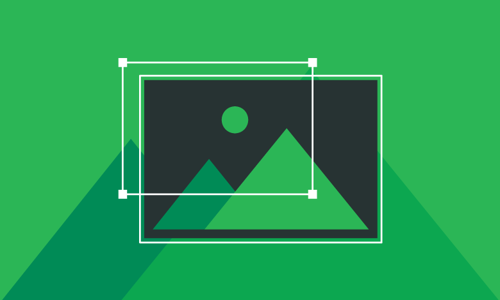

In [3]:
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_logow

In [12]:
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo.show()

## Converting Images

In [13]:
image_logow = np.array(image_logow.convert('RGB'))
image_textw = np.array(image_textw.convert('RGB'))
h_image1, w_image1, _ = image_logow.shape
h_image2, w_image2, _ = image_textw.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

## Getting Coordinates

In [14]:
#Get Center
center_y = int(h_image1 / 2)
center_x = int(w_image1 / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [15]:
# Get Region of Interest
roi = image_logow[top_y: bottom_y, left_x: right_x]
result = cv2.addWeighted(roi, 1, logo, 1, 0)

## Plotting the Watermark

### Image Watermark

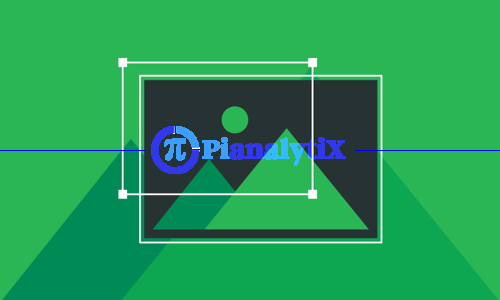

In [17]:
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image1, center_y), (0, 0, 255), 1)
image_logow[top_y: bottom_y, left_x: right_x] = result
img = Image.fromarray(image_logow, 'RGB')
img

### Text Watermark

In [19]:
image = Image.open(requests.get('https://images.unsplash.com/photo-1554177255-61502b352de3?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2070&q=80', stream=True).raw)
image_textw = image.resize((500,300))

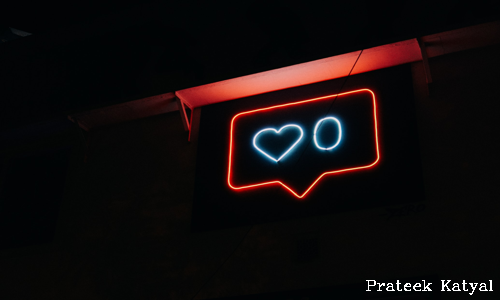

In [20]:
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Prateek Katyal', org=(w_image2 - 135, h_image2 - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(255,255,255), thickness=1, lineType=cv2.LINE_4); 
timg = Image.fromarray(image_text, 'RGB')
timg

## Acknowledgments

Image with logo Taken from <a href="https://sproutsocial.com/">SproutSocial</a>

Image without logo taken from Unsplash (<a href="https://unsplash.com/@prateekkatyal">Prateek Katyal</a>)

Logo from <a href="https://pianalytix.com">Pianalytix</a>